In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据获取

In [2]:
path = "exp2data2.txt"
data = pd.read_csv(path, names=["test1", "test2", "accepted"])
data.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


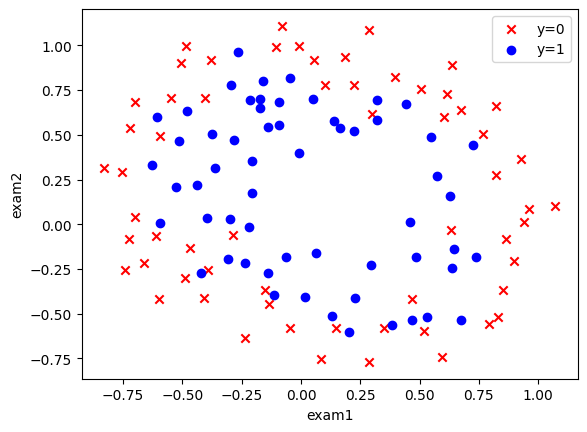

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[data["accepted"]==0]["test1"], data[data["accepted"]==0]["test2"], c="r", marker="x", label="y=0")
ax.scatter(data[data["accepted"]==1]["test1"], data[data["accepted"]==1]["test2"], c="b", marker="o", label="y=1")
ax.legend()

ax.set(xlabel="exam1", ylabel="exam2")
plt.show()

## 特征映射

In [4]:
def featureMap(x1, x2, power):
    data = {}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data["F{}{}".format(i-j, j)] = np.power(x1, i - j) * np.power(x2, j)
    
    return pd.DataFrame(data)

In [5]:
x1 = data["test1"]
x2 = data["test2"]

In [6]:
data2 = featureMap(x1, x2, 6)

In [7]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 构造数据集

In [8]:
X = data2.values
X.shape

(118, 28)

In [9]:
Y = data.iloc[:, -1].values
Y = Y.reshape(len(Y), 1)
Y.shape

(118, 1)

## 损失函数

In [10]:
# 正则化
def sigmod(z):
    return 1 / (1 + np.exp(-z))

def costFunc(X, theta, Y, lr):
    A = sigmod(X @ theta)
    first = (-Y) * np.log(A)
    second = -(1 - Y) * np.log(1 - A)
    
    reg = np.sum(np.power(theta[1:], 2)) * (lr / (2 * len(X)))  # 正则化
    
    return np.mean(first + second) + reg

In [11]:
theta = np.zeros((28, 1))
theta.shape

(28, 1)

In [12]:
lr = 1
cost_init = costFunc(X, theta, Y, lr)
print(cost_init)

0.6931471805599454


## 梯度下降

In [13]:
def gradientDescent(X, theta, Y, iters, alpha, lr):
    costs = []
    for i in range(iters):
        reg = theta[1:] * (lr / len(X))
        reg = np.insert(reg, 0, values=0, axis=0)
        A = sigmod(X @ theta)
        theta = theta - alpha * X.T @ (A - Y) / len(X) - reg
        cost = costFunc(X, theta, Y, lr)
        costs.append(cost)
    
    return costs, theta

In [14]:
alpha = 0.001
iters = 1000000
lr = 0.001

In [15]:
costs, theta_final= gradientDescent(X, theta, Y, iters, alpha, lr)

## 预测

In [16]:
def predict(X, theta):
    prob = sigmod(X @ theta)
    return [1 if i >= 0.5 else 0 for i in prob]

In [17]:
y_ = np.array(predict(X, theta_final))
y_predict = y_.reshape(len(y_), 1)

acc = np.mean(y_predict == Y)
print(acc)

0.8305084745762712


## 决策

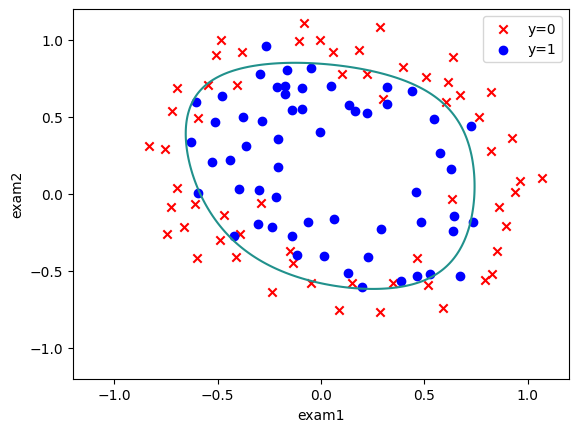

In [18]:
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z = featureMap(xx.ravel(), yy.ravel(), 6).values
zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(data[data["accepted"]==0]["test1"], data[data["accepted"]==0]["test2"], c="r", marker="x", label="y=0")
ax.scatter(data[data["accepted"]==1]["test1"], data[data["accepted"]==1]["test2"], c="b", marker="o", label="y=1")
ax.legend()

ax.set(xlabel="exam1", ylabel="exam2")
plt.contour(xx, yy, zz, 0)
plt.show()